In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.drop('CustomerID', axis=1, inplace=True)

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df.head()

Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      1   19                  15                      39
1      1   21                  15                      81
2      0   20                  16                       6
3      0   23                  16                      77
4      0   31                  17                      40

In [6]:
df = df.rename(columns={'Genre': 'Gender'})

In [7]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

In [8]:
df = pd.get_dummies(df, drop_first=True)
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

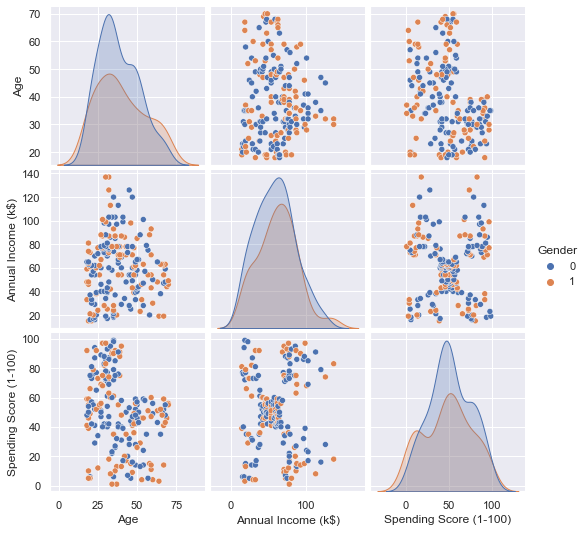

In [9]:
sns.pairplot(df, hue = 'Gender')
plt.show()

In [10]:
df.drop('Gender', axis=1, inplace=True)

In [11]:
from sklearn.cluster import KMeans

In [12]:
df.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df)

In [14]:
pd.DataFrame(df_sc)

0         1         2
0   -1.424569 -1.738999 -0.434801
1   -1.281035 -1.738999  1.195704
2   -1.352802 -1.700830 -1.715913
3   -1.137502 -1.700830  1.040418
4   -0.563369 -1.662660 -0.395980
..        ...       ...       ...
195 -0.276302  2.268791  1.118061
196  0.441365  2.497807 -0.861839
197 -0.491602  2.497807  0.923953
198 -0.491602  2.917671 -1.250054
199 -0.635135  2.917671  1.273347

[200 rows x 3 columns]

In [15]:
kmeans = KMeans(n_clusters = 3, verbose = 1, random_state = 422, algorithm = 'auto')
kmeans_fit =kmeans.fit(df_sc)

Initialization complete
Iteration 0, inertia 433.4614336101651
Iteration 1, inertia 354.33374388625674
Iteration 2, inertia 324.92478860626227
Iteration 3, inertia 304.57229619604186
Iteration 4, inertia 298.80355638859567
Iteration 5, inertia 297.14595011263975
Iteration 6, inertia 297.08845295781504
Iteration 7, inertia 297.02654463384187
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 395.57141428120343
Iteration 1, inertia 307.9952152287179
Iteration 2, inertia 300.41038585168275
Iteration 3, inertia 297.7827485175383
Iteration 4, inertia 296.17777681881137
Iteration 5, inertia 296.0919115267863
Iteration 6, inertia 295.9682956968384
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 399.1565701782629
Iteration 1, inertia 349.5385080116158
Iteration 2, inertia 339.3507478941295
Iteration 3, inertia 337.57618819336005
Iteration 4, inertia 337.45550405907306
Iteration 5, inertia 337.25021977034334
Iter

In [16]:
kmeans_fit.cluster_centers_

array([[-0.43033758,  1.02223317,  1.15593564],
       [ 0.82935381, -0.00348296, -0.65438593],
       [-0.98371627, -0.65995549,  0.24488394]])

In [17]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [18]:
kmeans_fit.predict(df_sc)

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [19]:
df['Clusters'] = kmeans_fit.predict(df_sc)

In [20]:
df.shape

(200, 4)

In [21]:
print("Number of Recors in Cluster 0: ", df[df.Clusters == 0].count().unique())
print("Number of Recors in Cluster 1: ", df[df.Clusters == 1].count().unique())
print("Number of Recors in Cluster 2: ", df[df.Clusters == 2].count().unique())

Number of Recors in Cluster 0:  [41]
Number of Recors in Cluster 1:  [96]
Number of Recors in Cluster 2:  [63]


#### Total WCSS : Total Within-Clusters Sum of Squares. The lower number the better

In [22]:
kmeans_fit.inertia_

295.4562449213557

#### SILHOUETTE COEFFICIENTS:

In [23]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [24]:
silhouette_score(df_sc, kmeans.labels_)
# Below score the the mean of all the Silhouette_Sample we have.

0.3579234303882264

In [25]:
# Silhouette Coefficients for each sample.
silhouette_samples(df_sc, kmeans.labels_)

array([ 4.31146679e-01,  4.25490624e-01,  2.09560776e-01,  4.51678615e-01,
        3.25082401e-01,  4.58404181e-01, -2.92890710e-03,  3.24918844e-01,
        3.35925808e-01,  4.46973126e-01,  3.50593652e-01,  2.11357865e-01,
        3.30406391e-01,  4.53844036e-01,  1.12911977e-02,  4.42663908e-01,
        1.98961425e-01,  4.97204978e-01,  2.79107868e-01,  1.96545519e-01,
        1.96019550e-01,  4.72560199e-01,  2.34594521e-01,  4.27554118e-01,
        3.49156453e-01,  3.66687984e-01,  1.63739147e-01,  3.86076072e-01,
        1.31142776e-02,  3.49785434e-01,  3.75841198e-01,  4.63282917e-01,
        3.52159690e-01,  2.77666518e-01,  3.23093823e-01,  3.85820723e-01,
        1.91891395e-01,  3.98128851e-01, -4.45974154e-02,  4.10548643e-01,
        4.41710318e-01,  2.10827355e-01,  3.08467924e-01,  4.39721279e-01,
        3.51244635e-01,  4.71654223e-01,  2.33023303e-01,  4.91424598e-01,
        4.12807546e-01,  3.64296219e-01,  2.51621044e-01,  3.91926240e-01,
        4.46883016e-01,  

#### TUNING HYPERPARAMETER K

In [26]:
WCSS = [] # For Elbow Method
silhouette_coefficients = [] # For Silhouette Method
K = 15
for i in range(2, K+1): #Notive you start at 2 clusters for Silhouette Coeffcient
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(df_sc)
    WCSS.append(kmeans.inertia_)
    scores = silhouette_score(df_sc, kmeans.labels_)
    silhouette_coefficients.append(scores)

In [27]:
optimal_k = pd.DataFrame({'K':range(2,K+1), 'WCSS':WCSS, 'Silhouette_Score':silhouette_coefficients})
optimal_k

K        WCSS  Silhouette_Score
0    2  389.386189          0.335472
1    3  295.212246          0.357793
2    4  205.225147          0.403958
3    5  168.247580          0.416643
4    6  133.888870          0.426855
5    7  117.011555          0.417232
6    8  104.154299          0.407638
7    9   92.926043          0.419861
8   10   82.542192          0.399223
9   11   72.684524          0.406662
10  12   66.922023          0.388359
11  13   62.690809          0.391162
12  14   58.875247          0.372631
13  15   57.411914          0.356733

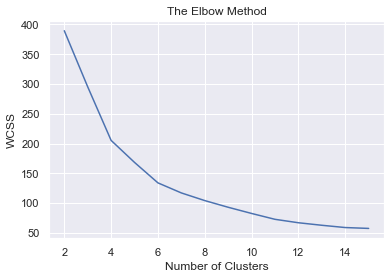

In [28]:
sns.lineplot(x = 'K', y = 'WCSS', data = optimal_k)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

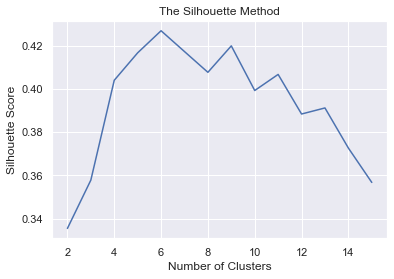

In [30]:
sns.lineplot(x = 'K', y=silhouette_coefficients, data = optimal_k)
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### CLUSTER VISUALIZATION (2D)

In [31]:
df.head()

Age  Annual Income (k$)  Spending Score (1-100)  Clusters
0   19                  15                      39         2
1   21                  15                      81         2
2   20                  16                       6         2
3   23                  16                      77         2
4   31                  17                      40         2

In [32]:
df_viz = df.drop('Age', axis = 1, inplace = False)

In [33]:
df_viz.head()

Annual Income (k$)  Spending Score (1-100)  Clusters
0                  15                      39         2
1                  15                      81         2
2                  16                       6         2
3                  16                      77         2
4                  17                      40         2

In [34]:
kmeans = KMeans(n_clusters = 6, random_state = 300)
clusters = kmeans.fit_predict(df_viz)
clusters

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5])

In [41]:
pd.DataFrame(clusters)

0
0    0
1    4
2    0
3    4
4    0
..  ..
195  5
196  3
197  5
198  3
199  5

[200 rows x 1 columns]

In [35]:
kmeans.cluster_centers_

array([[2.63043478e+01, 2.09130435e+01, 1.21739130e+00],
       [5.52962963e+01, 4.95185185e+01, 1.38271605e+00],
       [7.80357143e+01, 8.18928571e+01, 4.44089210e-16],
       [8.82000000e+01, 1.71142857e+01, 1.08571429e+00],
       [2.57272727e+01, 7.93636364e+01, 2.00000000e+00],
       [1.08181818e+02, 8.27272727e+01, 2.22044605e-16]])

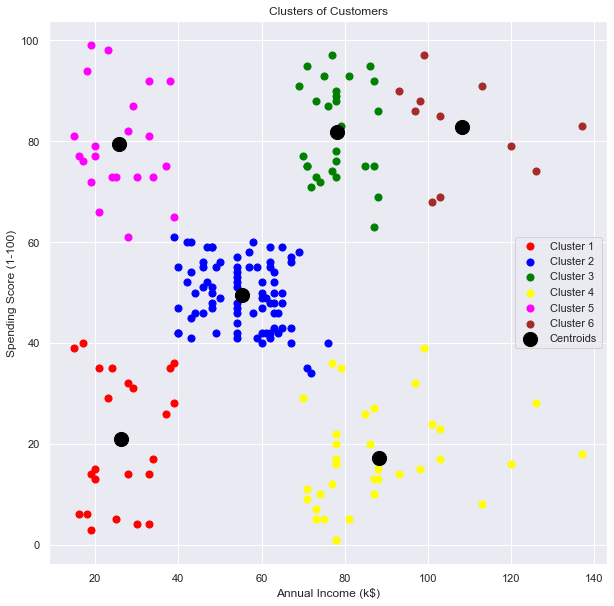

In [36]:
plt.figure(figsize = (10,10))
plt.scatter(df_viz[clusters == 0].iloc[:,0], df_viz[clusters == 0].iloc[:,1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df_viz[clusters == 1].iloc[:,0], df_viz[clusters == 1].iloc[:,1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(df_viz[clusters == 2].iloc[:,0], df_viz[clusters == 2].iloc[:,1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(df_viz[clusters == 3].iloc[:,0], df_viz[clusters == 3].iloc[:,1], s = 50, c = 'yellow', label = 'Cluster 4')
plt.scatter(df_viz[clusters == 4].iloc[:,0], df_viz[clusters == 4].iloc[:,1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(df_viz[clusters == 5].iloc[:,0], df_viz[clusters == 5].iloc[:,1], s = 50, c = 'brown', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### HIERARCHICAL CLUSTERING

In [37]:
import scipy.cluster.hierarchy as sch

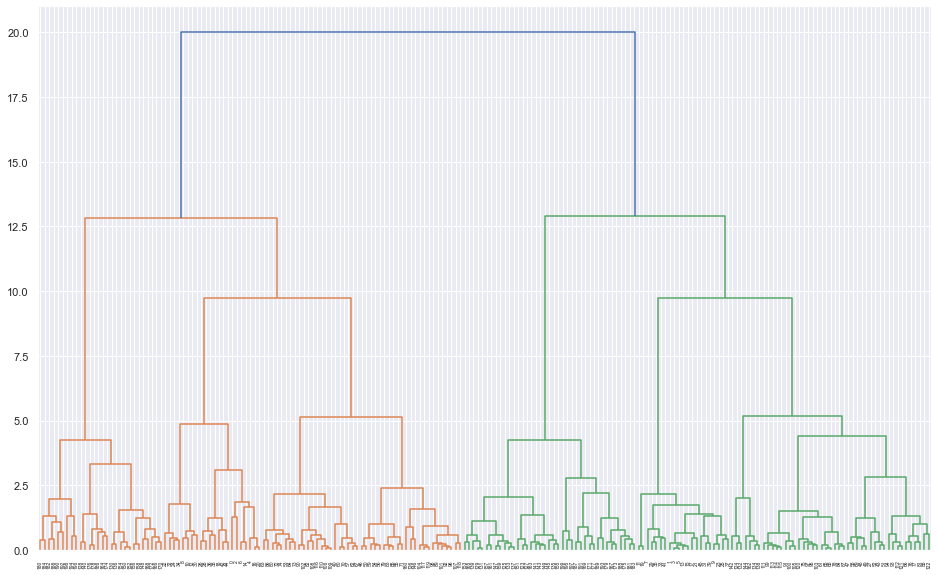

In [38]:
plt.figure(figsize = (16, 10))
dend = sch.dendrogram(sch.linkage(df_sc, method = 'ward'))
# 'ward' uses the ward linkage method (minimize the WCV)

In [39]:
# Fitting HIERARCHICAL CLUSTERING to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(df_sc)

In [40]:
hc_clusters

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)